In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#from keras.callbacks import EarlyS
from keras.callbacks import EarlyStopping

In [4]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [5]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

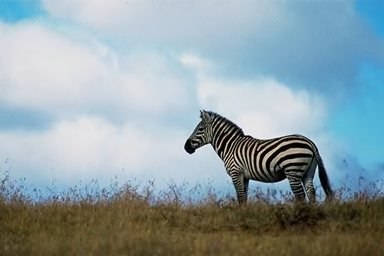

In [6]:
real_image_path = 'D:/Teja/image 1.png'
Image.open(real_image_path)

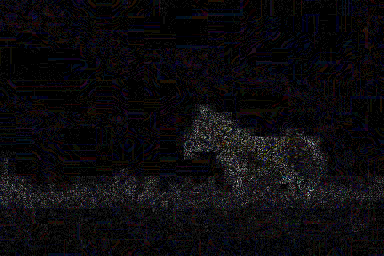

In [7]:
convert_to_ela_image(real_image_path, 90)

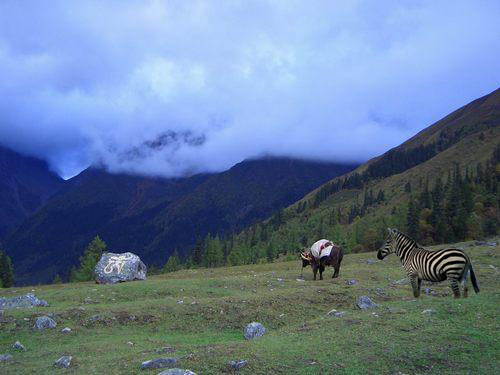

In [8]:
fake_image_path = 'D:/Teja/image2.png'
Image.open(fake_image_path)

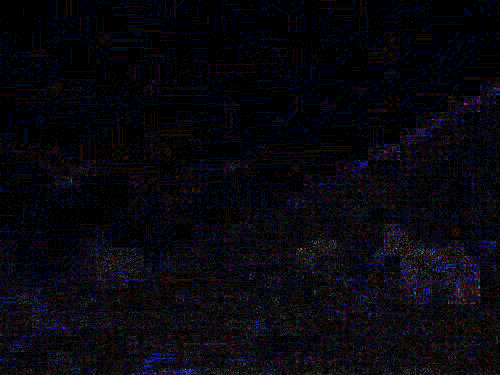

In [9]:
convert_to_ela_image(fake_image_path, 90)

DENOISING REAL IMAGE

In [10]:

# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

img_r=skimage.io.imread('D:/Teja/image 1.png')
img_r=skimage.img_as_float(img_r) #converting image as float

#sigma=0.35 #noise
#imgn=random_noise(img,var=sigma**2) # adding noise

sigma_est=estimate_sigma(img_r,multichannel=True,average_sigmas=True)  #Noise estimation

# Denoising using Bayes
img_bayes=denoise_wavelet(img_r,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


#Denoising using Visushrink
img_visushrink=denoise_wavelet(img_r,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


In [11]:
import cv2
psnr_noisy = cv2.PSNR(img_r,img_r)
psnr_noisy

361.20199909921956

In [12]:
psnr_bayes = cv2.PSNR(img_r,img_bayes)
psnr_bayes

124.60573219905689

In [13]:
psnr_visu = cv2.PSNR(img_r,img_visushrink)
psnr_bayes

124.60573219905689

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


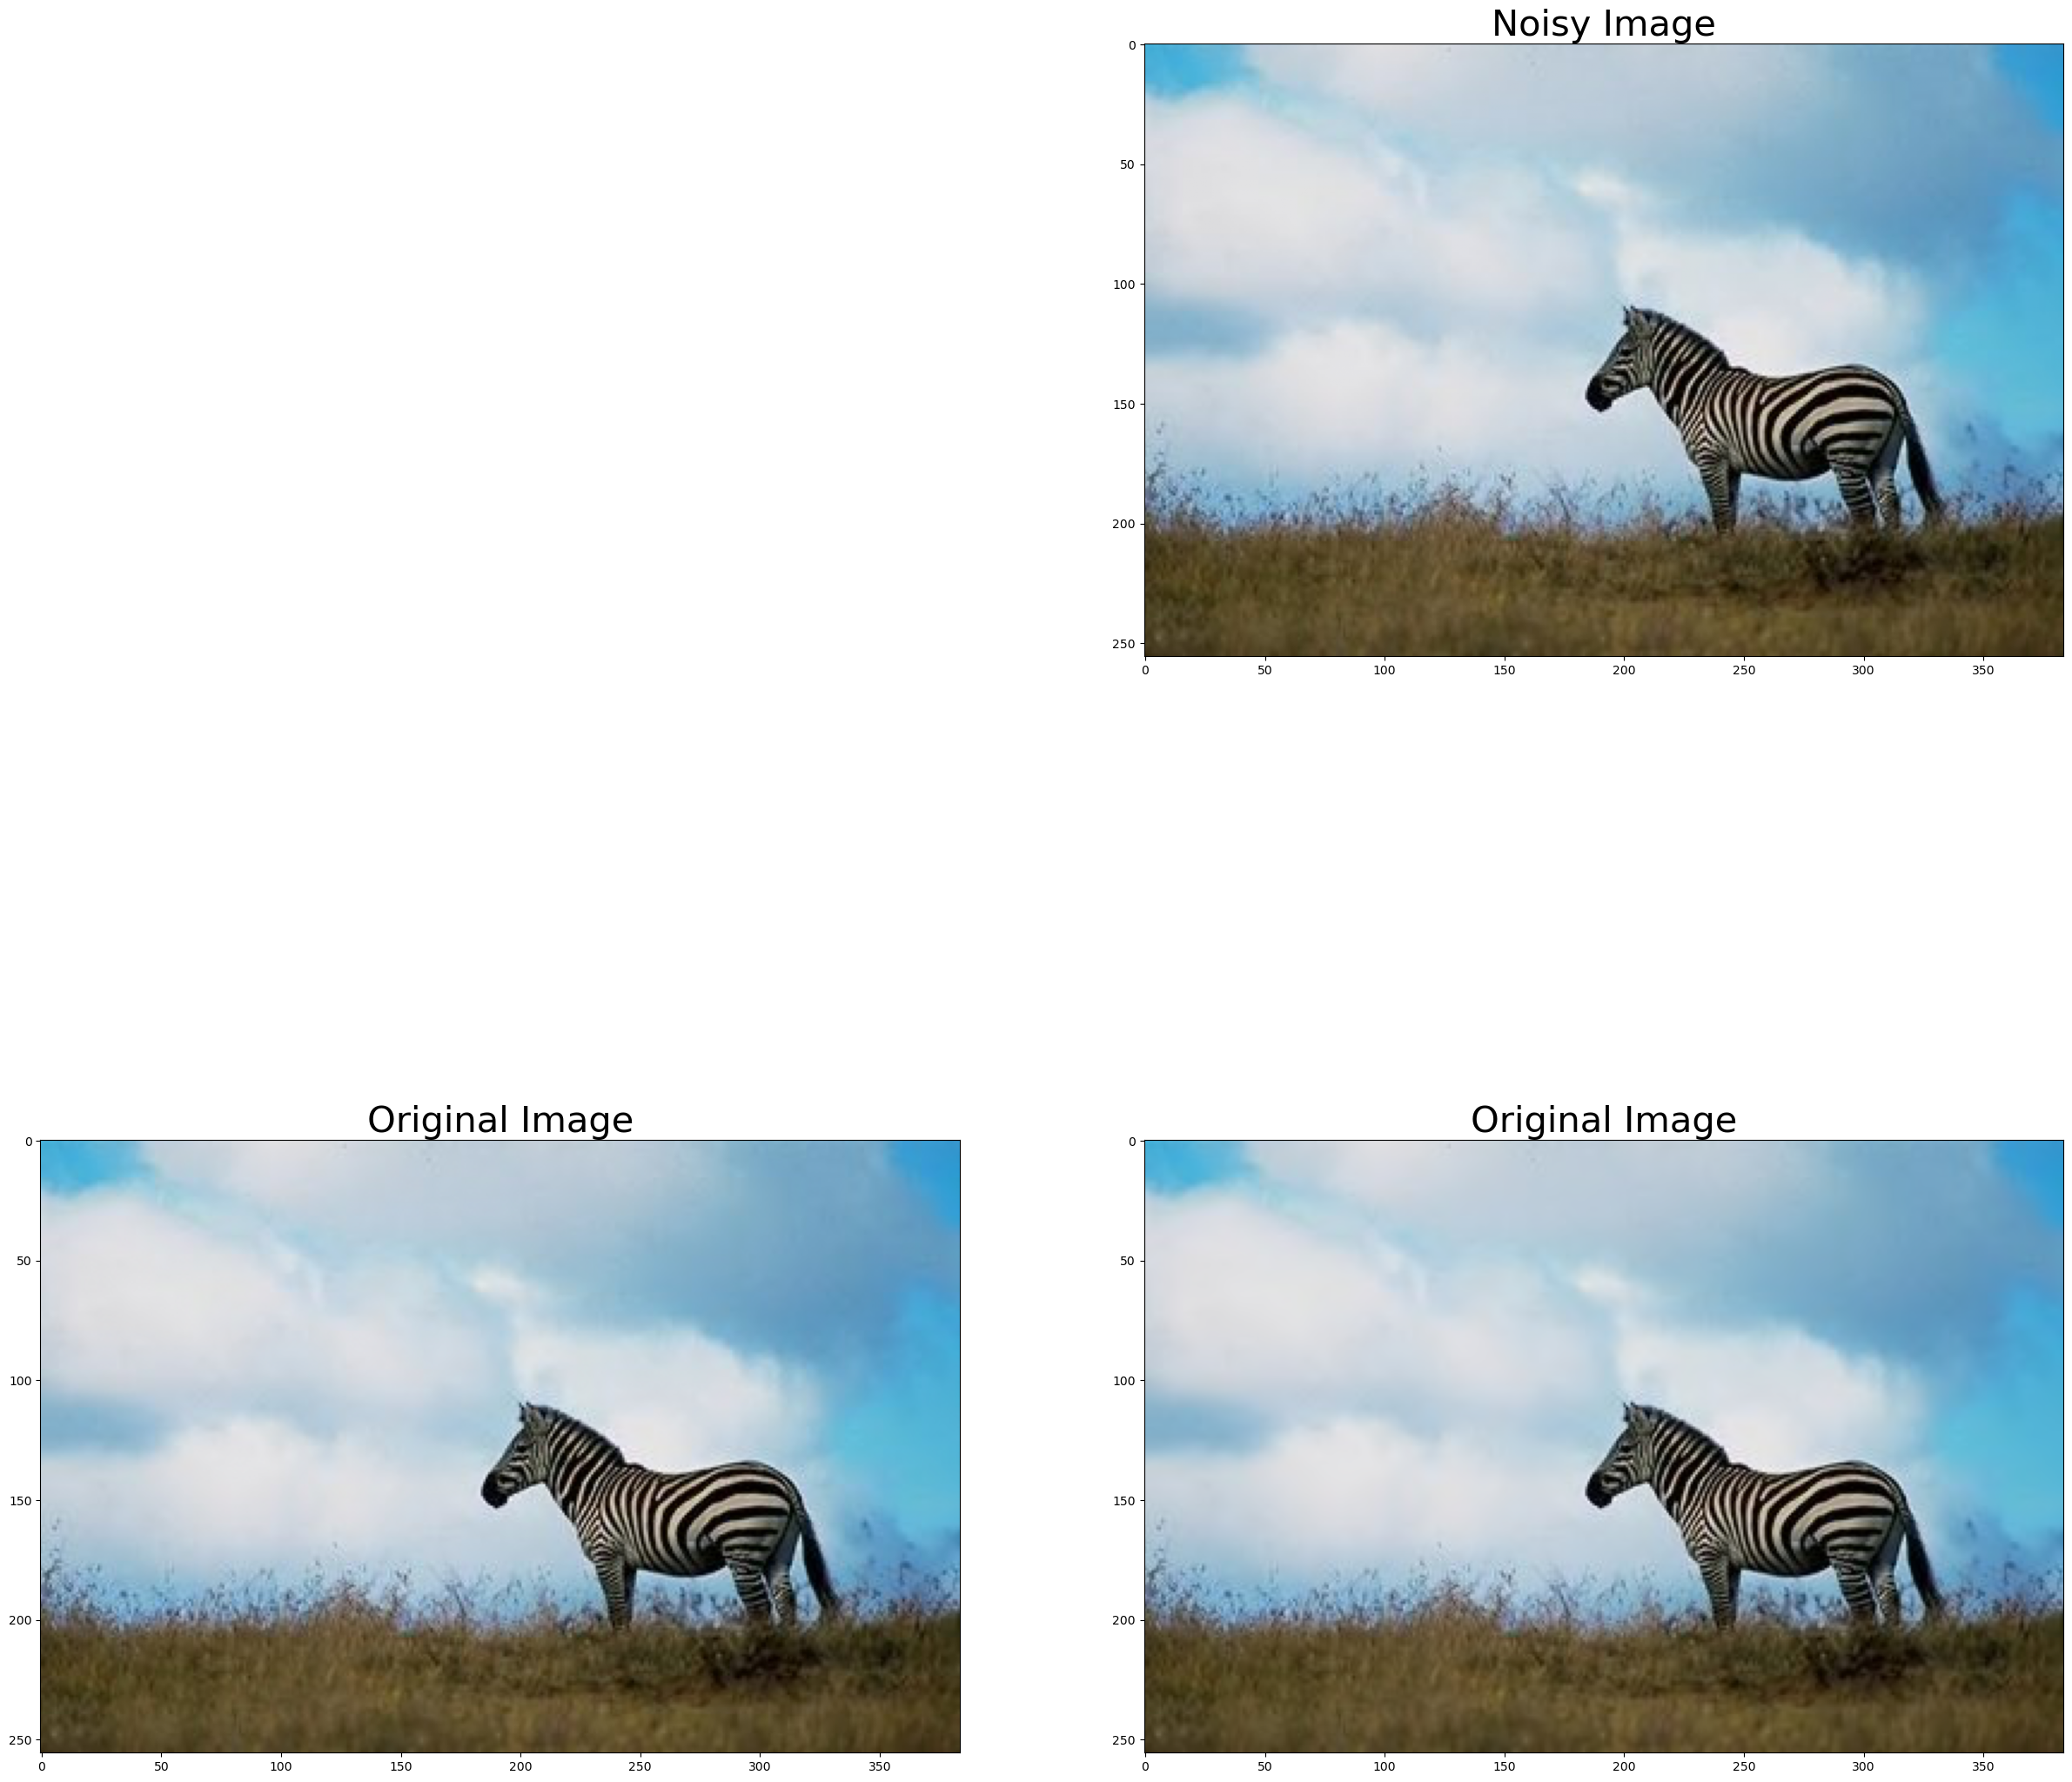

In [14]:
# Plotting images
plt.figure(figsize=(30,30))

# plt.subplot(2,2,1)
# plt.imshow(img,cmap=plt.cm.gray)
# plt.title('Original Image',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(img_r,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.show()

In [15]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)


PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 100.08271190521796
PSNR[Original vs. Denoised(Bayes)] 124.60573219905689


DENOISING FAKE IMAGE

In [16]:
# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

img_f=skimage.io.imread('D:/Teja/image2.png')
img_f=skimage.img_as_float(img_f) #converting image as float

#sigma=0.35 #noise
#imgn=random_noise(img,var=sigma**2) # adding noise

sigma_est=estimate_sigma(img_f,multichannel=True,average_sigmas=True)  #Noise estimation

# Denoising using Bayes
img_bayes=denoise_wavelet(img_f,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


#Denoising using Visushrink
img_visushrink=denoise_wavelet(img_f,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


In [17]:
import cv2
psnr_noisy = cv2.PSNR(img_f,img_f)
psnr_noisy

361.20199909921956

In [18]:
psnr_bayes = cv2.PSNR(img_f,img_bayes)
psnr_bayes

120.58626094108678

In [19]:
psnr_visu = cv2.PSNR(img_f,img_visushrink)
psnr_bayes

120.58626094108678

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


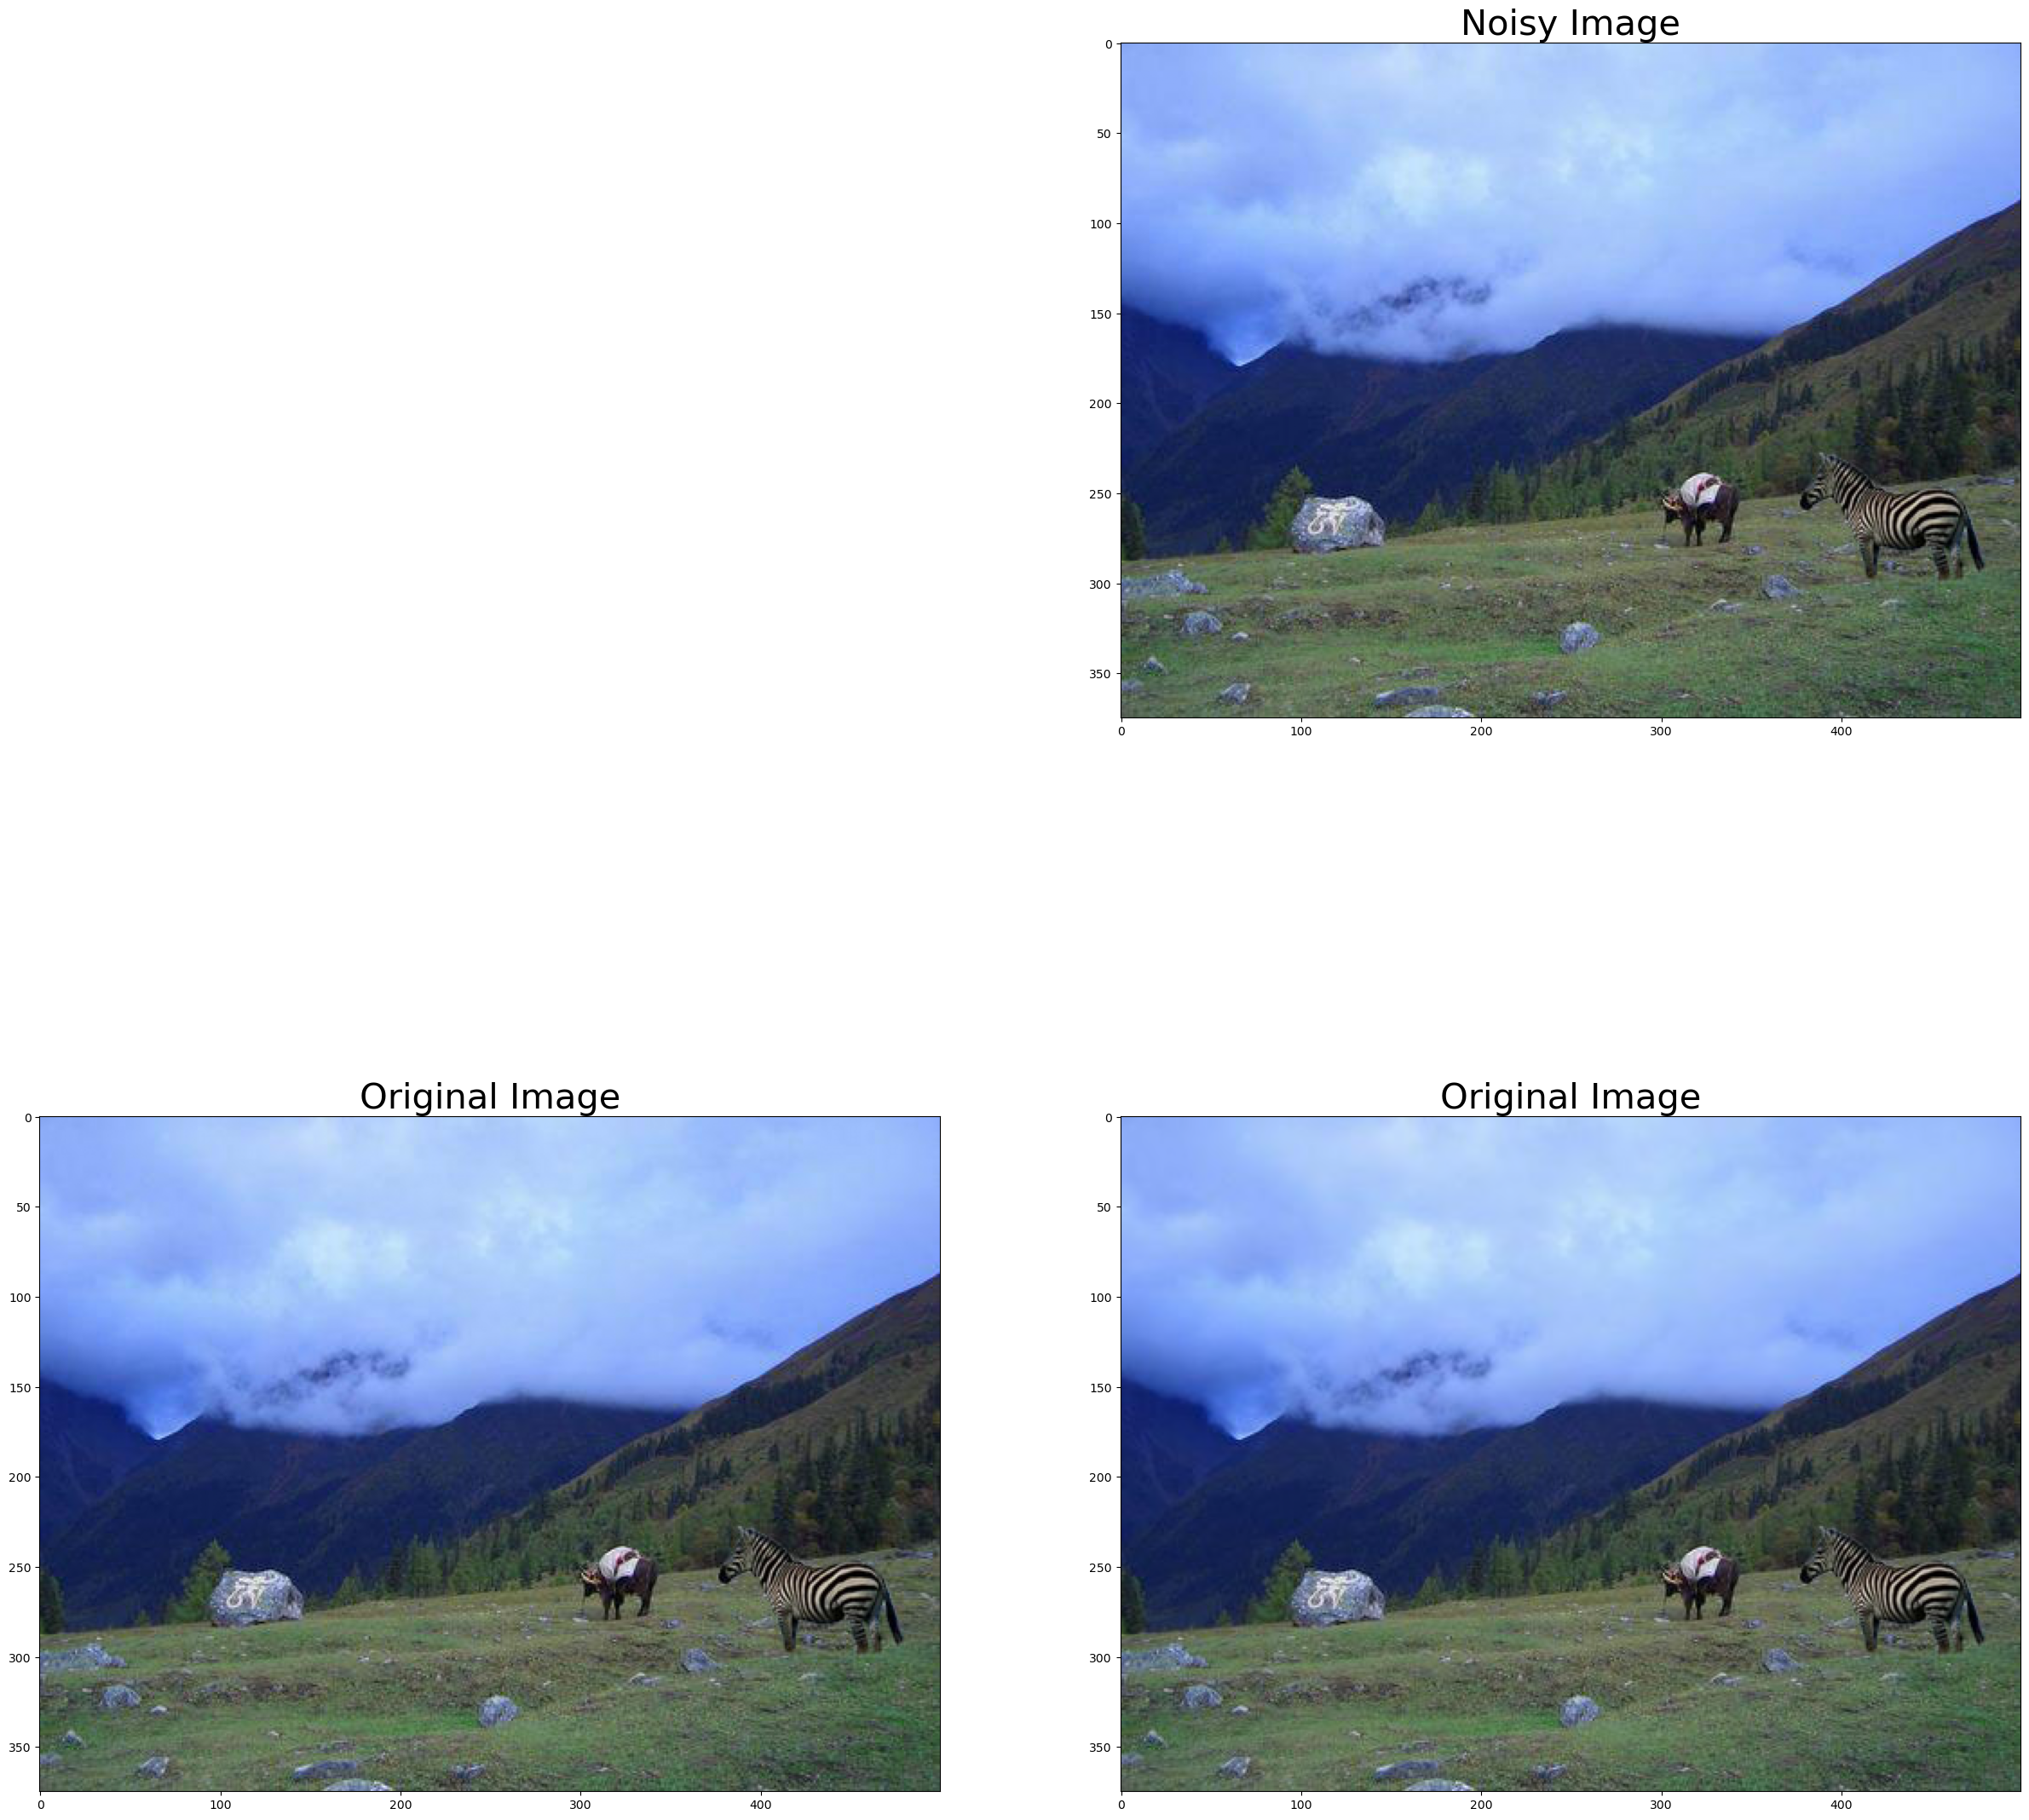

In [20]:
# Plotting images
plt.figure(figsize=(30,30))

# plt.subplot(2,2,1)
# plt.imshow(img,cmap=plt.cm.gray)
# plt.title('Original Image',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(img_f,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.show()

In [21]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)

PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 97.24783471476827
PSNR[Original vs. Denoised(Bayes)] 120.58626094108678


In [22]:
# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

In [23]:
def denoise_img(img):
    #img=skimage.io.imread('../input/casia-dataset/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg')
    img=skimage.img_as_float(img_f) #converting image as float


    sigma_est=estimate_sigma(img,multichannel=True,average_sigmas=True)  #Noise estimation

    # Denoising using Bayes
    img_bayes=denoise_wavelet(img,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


    #Denoising using Visushrink
    img_visushrink=denoise_wavelet(img,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
    wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)
    return img_bayes 


In [24]:
image_size = (128, 128)

In [25]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [26]:
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

In [27]:
import random
path = 'D:/Teja'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))

7 7


In [28]:
path = 'D:/Teja/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

14 14


In [29]:
import numpy as np
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [30]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

11 11
3 3


In [31]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    return model

In [32]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 256)               29491456  
                                                        

In [33]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])



In [34]:
epochs = 30
batch_size = 32

In [35]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [37]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
x_train2 = np.array(X_train, copy=True) 
y_train2 = np.array(Y_train, copy=True) 

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)

datagen.fit(X_train)

print(type(X_train))

#earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min')

validation_generator = datagen.flow(x_train2, y_train2, batch_size=32, subset='validation')
train_generator = datagen.flow(x_train2, y_train2,batch_size=32, subset='training')


# # fits the model on batches with real-time data augmentation:
history = model.fit_generator(train_generator, epochs=epochs, validation_data = (X_val,Y_val), verbose = 1,callbacks = [early_stopping])

<class 'numpy.ndarray'>
Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6971 - accuracy: 0.5556 - val_loss: 0.7527 - val_accuracy: 0.3333
Epoch 2/30
1/1 [==============================] - 1s 700ms/step - loss: 4.6693 - accuracy: 0.4444 - val_loss: 1.2607 - val_accuracy: 0.6667
Epoch 3/30
1/1 [==============================] - 1s 750ms/step - loss: 16.1278 - accuracy: 0.4444 - val_loss: 0.7124 - val_accuracy: 0.3333
Epoch 4/30
1/1 [==============================] - 1s 719ms/step - loss: 2.2379 - accuracy: 0.5556 - val_loss: 0.7656 - val_accuracy: 0.6667
Epoch 5/30
1/1 [==============================] - 1s 713ms/step - loss: 3.5726 - accuracy: 0.4444 - val_loss: 0.7126 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 1s 752ms/step - loss: 1.4888 - accuracy: 0.6667 - val_loss: 0.7052 - val_accuracy: 0.3333
Epoch 7/30
1/1 [==============================] - 1s 705ms/step - loss: 0.3905 - accuracy: 0.7778 - val_loss: 0.7033 - val_accuracy: 0

1/1 [==============================] - 1s 719ms/step - loss: 0.4836 - accuracy: 0.5556 - val_loss: 0.7009 - val_accuracy: 0.0000e+00
Epoch 24/30
1/1 [==============================] - 1s 742ms/step - loss: 0.5244 - accuracy: 0.6667 - val_loss: 0.7001 - val_accuracy: 0.0000e+00
Epoch 25/30
1/1 [==============================] - 1s 701ms/step - loss: 0.5104 - accuracy: 0.6667 - val_loss: 0.6997 - val_accuracy: 0.3333
Epoch 26/30
1/1 [==============================] - 1s 761ms/step - loss: 0.4949 - accuracy: 0.7778 - val_loss: 0.7007 - val_accuracy: 0.3333
Epoch 27/30
1/1 [==============================] - 1s 709ms/step - loss: 0.5064 - accuracy: 0.5556 - val_loss: 0.6995 - val_accuracy: 0.3333
Epoch 28/30
1/1 [==============================] - 1s 749ms/step - loss: 0.4457 - accuracy: 0.7778 - val_loss: 0.6999 - val_accuracy: 0.3333
Epoch 29/30
1/1 [==============================] - 1s 717ms/step - loss: 0.5379 - accuracy: 0.6667 - val_loss: 0.6991 - val_accuracy: 0.3333
Epoch 30/30
1/1 [

In [38]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [39]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.6919 - accuracy: 0.5455 - val_loss: 0.6973 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 1s 539ms/step - loss: 0.6918 - accuracy: 0.6364 - val_loss: 0.6985 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 1s 534ms/step - loss: 0.6925 - accuracy: 0.6364 - val_loss: 0.7002 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 1s 524ms/step - loss: 0.6913 - accuracy: 0.6364 - val_loss: 0.7025 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 1s 545ms/step - loss: 0.6894 - accuracy: 0.6364 - val_loss: 0.7057 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 1s 537ms/step - loss: 0.6896 - accuracy: 0.6364 - val_loss: 0.7095 - val_accuracy: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 1s 569ms/step - loss: 0.6877 - accuracy: 0.7273 - val_loss: 0.7146 - val_accuracy: 0.0000

Epoch 23/30
1/1 [==============================] - 1s 521ms/step - loss: 0.6549 - accuracy: 0.6364 - val_loss: 0.8716 - val_accuracy: 0.0000e+00
Epoch 24/30
1/1 [==============================] - 1s 534ms/step - loss: 0.6562 - accuracy: 0.6364 - val_loss: 0.8841 - val_accuracy: 0.0000e+00
Epoch 25/30
1/1 [==============================] - 1s 545ms/step - loss: 0.6823 - accuracy: 0.6364 - val_loss: 0.8956 - val_accuracy: 0.0000e+00
Epoch 26/30
1/1 [==============================] - 1s 541ms/step - loss: 0.6471 - accuracy: 0.6364 - val_loss: 0.9084 - val_accuracy: 0.0000e+00
Epoch 27/30
1/1 [==============================] - 1s 520ms/step - loss: 0.6441 - accuracy: 0.6364 - val_loss: 0.9222 - val_accuracy: 0.0000e+00
Epoch 28/30
1/1 [==============================] - 1s 541ms/step - loss: 0.6340 - accuracy: 0.6364 - val_loss: 0.9375 - val_accuracy: 0.0000e+00
Epoch 29/30
1/1 [==============================] - 1s 546ms/step - loss: 0.6535 - accuracy: 0.5455 - val_loss: 0.9534 - val_accura

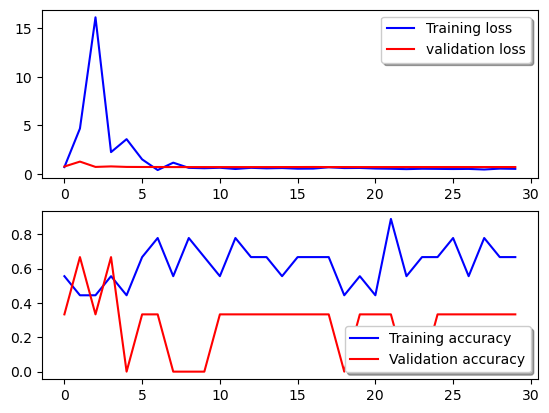

In [40]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

1/1 [==============================] - 0s 95ms/step


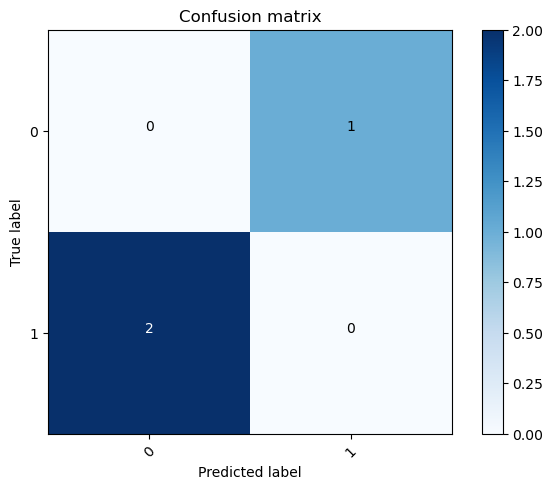

In [42]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))


In [43]:
class_names = ['fake', 'real']

In [44]:
real_image_path = 'D:/Teja/image2.png'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 23ms/step
Class: fake Confidence: 62.16


In [45]:
fake_image_path = 'D:/Teja/image1_forgered.png'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 40ms/step
Class: real Confidence: 65.85


In [46]:
fake_image = os.listdir('D:/Teja')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        fake_image_path = os.path.join('D:/Teja/', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
#             print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 33ms/step


In [47]:
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 1, Correct: 0, Acc: 0.0


In [48]:
real_image = os.listdir('D:/Teja/')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('D:/Teja/', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
#             print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 33ms/step


In [49]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 1, Correct: 1, Acc: 100.0
Total: 2, Correct: 1, Acc: 50.0
